<a href="https://colab.research.google.com/github/guylozius/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Goal

<p> The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.<p>

# Importing the Dataframe

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/coding dojo/stack_one/sales_predictions.csv")
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Cleaning the Dataframe 

## Show the size of the dataframe.

In [4]:
df.shape

(8523, 12)

## Show the data type of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Checking if any rows are duplicated and then droping duplicated rows.

In [6]:
df.duplicated().sum()

0

## Looking for missing value

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.isna().sum().sum()

3873

> The dataframe is missing values in Item_Weight and in Outlet_Size




## Dropping Item_Weight

In [9]:
#Seeing how many unique values in this columns
df['Item_Weight'].value_counts().sum()

7060

Through my Observation I deceid to drop Item_Weight becasuse it had too many unique value for me to find any type pattern to replace missing  or impute it ethier, and they too rows for me delete it would to much good data to lose.

In [10]:
df.drop(columns='Item_Weight', inplace=True)

> Item_Weight columns have too many unique values

## Finding pattern for Outlet_Size

In [11]:
#seeing how many unique values in this columns
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

> Outlet_Size columns only have three unique values

In [12]:
#Seeing how many unique values in this columns
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
#Returing the number of Nan in Outlet_Size group by Outlet_Type & Outlet_Location_Type
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.isnull().sum())

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                     0
                   Tier 3                   555
Supermarket Type1  Tier 1                     0
                   Tier 2                  1855
                   Tier 3                     0
Supermarket Type2  Tier 3                     0
Supermarket Type3  Tier 3                     0
Name: Outlet_Size, dtype: int64

> Only Tier 3 Grocery Store and Supermarket Type1 Tier 2 have missing values

In [14]:
#returning non-missing of Outlet_Size group by Outlet_Type & Outlet_Location_Type
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   528
                   Tier 3                     0
Supermarket Type1  Tier 1                  1860
                   Tier 2                   930
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Size, dtype: int64

> It seem that Tier 3 Grocery Store do not have non-missing values, but Tier 2 Supermarket Type1 do, thus I look for pattern there.

In [15]:
#Making Filter for  Tier 2 Supermarket Type1
Tier_2 = df['Outlet_Location_Type'] == 'Tier 2'
Supermarket_Type1	= df['Outlet_Type'] == 'Supermarket Type1'


In [16]:
#Return data frame with only Tier 2 Supermarket Type1
df.loc[Tier_2 & Supermarket_Type1, :].value_counts()

Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDU49            Regular           0.030689         Canned                 85.7540   OUT035             2004                       Small        Tier 2                Supermarket Type1  2163.8500            1
FDU26            Regular           0.042611         Dairy                  117.2782  OUT035             2004                       Small        Tier 2                Supermarket Type1  715.0692             1
FDU31            Regular           0.024986         Fruits and Vegetables  216.7508  OUT035             2004                       Small        Tier 2                Superma

In [17]:
# See the value of non-missing value of Tier_2 Supermarket_Type1
df.loc[Tier_2 & Supermarket_Type1, :]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

I see that non-missing value Tier 2 Supermarket Type1 are all small

In [18]:
# Making filter for Tier 1 Grocery Stores
Tier_1 = df['Outlet_Location_Type'] == 'Tier 1'
Grocery_Store	= df['Outlet_Type'] == 'Grocery Store'


In [19]:
#Return data frame with only Tier 1 Grocery Stores
df.loc[Tier_1 & Grocery_Store, :].tail(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8390,NCQ05,Low Fat,0.037829,Health and Hygiene,151.0708,OUT019,1985,Small,Tier 1,Grocery Store,451.4124
8404,DRH39,low fat,0.000000,Dairy,75.9670,OUT019,1985,Small,Tier 1,Grocery Store,153.1340
8405,FDB09,Low Fat,0.100493,Fruits and Vegetables,123.1046,OUT019,1985,Small,Tier 1,Grocery Store,124.5046
8442,FDX40,Low Fat,0.173324,Frozen Foods,39.9164,OUT019,1985,Small,Tier 1,Grocery Store,38.6164
8449,FDG02,Low Fat,0.019717,Canned,191.9188,OUT019,1985,Small,Tier 1,Grocery Store,571.2564
8454,NCH54,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8490,FDU44,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [20]:
# See the value of non-missing value of Tier_1 Grocery_Store
df.loc[Tier_1 & Grocery_Store, :]['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

## Replacing missing values

Through my Observation I decide to replace my missing data in Outlet_size with the value 'Small' because of small of amount unique data I was able to pattern with Tier_2 Supermarket_Type1 that was missing data with ones that was not missing data and one that one that was not missing data thier value was 'Small'
, so it safe to assume that other was same. When came to Grocery_Store missing data I was able to see other was given the value 'Small' as well and assume that missing data's value would be 'Small'. I colud not delete row because it would to much good data lost.

In [21]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

## Making sure there is no more missing value

In [22]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   528
                   Tier 3                   555
Supermarket Type1  Tier 1                  1860
                   Tier 2                  2785
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Size, dtype: int64

## looking for any inconsistent categories of data 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [25]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
df['Item_Fat_Content'] = df.loc[:, 'Item_Fat_Content'].str.replace('low fat', 'Low Fat').replace('LF','Low Fat').replace('reg','Regular')

In [27]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [29]:
df['Outlet_Size'] = df['Outlet_Size'].str.replace('Large','High')

## For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [30]:
df[['Item_Outlet_Sales']].describe().round(2)

,Item_Outlet_Sales
count,8523.00
mean,2181.29
std,1706.50
min,33.29
25%,834.25
50%,1794.33
75%,3101.30
max,13086.96


- min 33.29
- max 13086.96
- mean 2181.29

In [31]:
df[['Item_Visibility']].describe().round(2)

,Item_Visibility
count,8523.00
mean,0.07
std,0.05
min,0.00
25%,0.03
50%,0.05
75%,0.09
max,0.33


- min 0.00
- max 0.33
- mean 0.07

In [32]:
df[['Item_MRP']].describe().round(2)

,Item_MRP
count,8523.00
mean,140.99
std,62.28
min,31.29
25%,93.83
50%,143.01
75%,185.64
max,266.89


- min 31.29
- max 266.89
- mean 140.99

In [33]:
df[['Outlet_Establishment_Year']].describe().round()

,Outlet_Establishment_Year
count,8523.0
mean,1998.0
std,8.0
min,1985.0
25%,1987.0
50%,1999.0
75%,2004.0
max,2009.0


- min 1985
- max 2009
- mean 1998

# Visualize Data

## Making HeatMap for the  Correlation Coefficient

In [34]:
#getting the correlation coefficient
corr = df.corr()

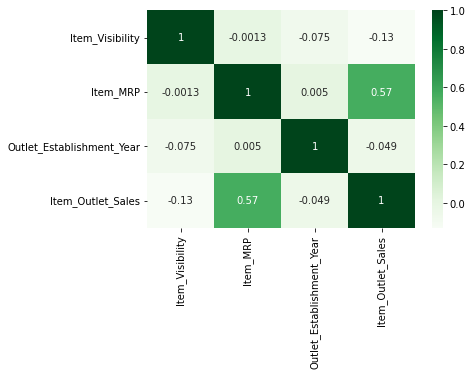

In [35]:
sns.heatmap(corr, cmap='Greens', annot=True);

> There seem to be a Moderate Correlation betweeen Item_MRP and Item_Outlet_Sales

## Making some histogram

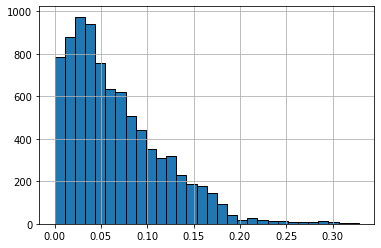

In [36]:
df['Item_Visibility'].hist(bins= 30, edgecolor='black');

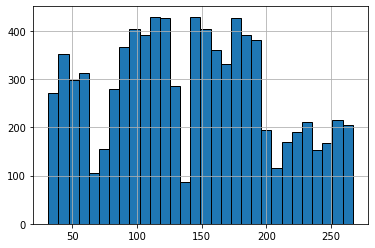

In [37]:
df['Item_MRP'].hist(bins= 30, edgecolor='black');

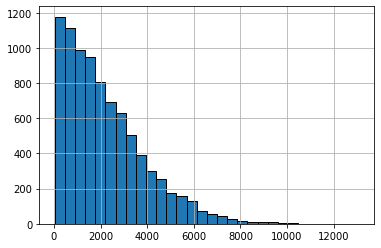

In [38]:
df['Item_Outlet_Sales'].hist(bins= 30, edgecolor='black');

## BoxPlot

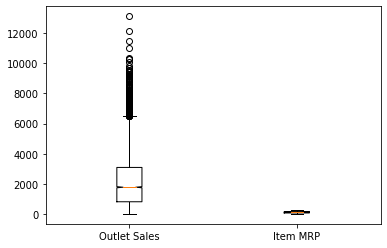

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([df['Item_Outlet_Sales'],df['Item_MRP']], notch = True, labels=['Outlet Sales', 'Item MRP']);

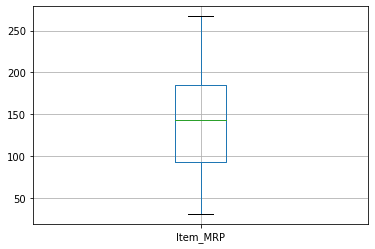

In [40]:
df.boxplot(column='Item_MRP')

#Better Graph

## Making a bar graph to show Avg Item_Outlet_Sales for each Outlet_Location_Type by Outlet_Size

In [41]:
#Creating and rearanging DataFrame
plot_df = df[['Outlet_Size','Item_Outlet_Sales','Outlet_Location_Type']]
plot_df = plot_df.groupby(['Outlet_Size','Outlet_Location_Type'],as_index=False)['Item_Outlet_Sales'].mean()
plot_df['Outlet_Size']= plot_df['Outlet_Size'].replace('High','Large')
plot_df = plot_df.pivot(index='Outlet_Location_Type',columns='Outlet_Size',values='Item_Outlet_Sales')
plot_df



Outlet_Size,Large,Medium,Small
Outlet_Location_Type,,,
Tier 1,NaN,2348.354635,1576.192909
Tier 2,NaN,NaN,2323.990559
Tier 3,2298.995256,2847.959679,339.351662


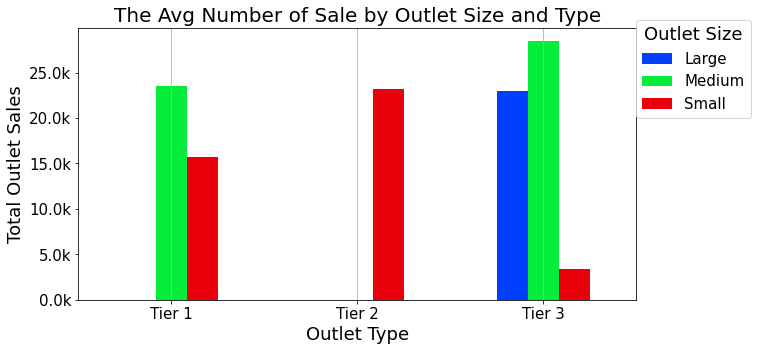

In [42]:
from matplotlib.ticker import FuncFormatter
#Convert the tick
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x * 1e-2)
formatter = FuncFormatter(thousands)
#Plotting and Styeling Bar Char
plt.style.use('seaborn-bright')
plot_df.plot(kind='bar', figsize=(10,5)).yaxis.set_major_formatter(formatter)
plt.title('The Avg Number of Sale by Outlet Size and Type',fontsize=20)
plt.xlabel('Outlet Type',fontsize=18)
plt.ylabel('Total Outlet Sales',fontsize=18)
plt.xticks(rotation=360, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(bottom=0)
plt.grid(axis='x')
plt.legend( title="Outlet Size",fontsize=15, title_fontsize = 18,loc=(1,0.67));

## Making Bar Graph for The Average Sales Per Item Type

In [43]:
#Creating and rearanging DataFrame
plot_df2=df.groupby('Item_Type', as_index=False)['Item_Outlet_Sales'].mean()
plot_df2.set_index('Item_Type',inplace=True)

In [44]:
#Sorting Item_Outlet_Sales 
plot_df2= plot_df2.sort_values(by=['Item_Outlet_Sales'])

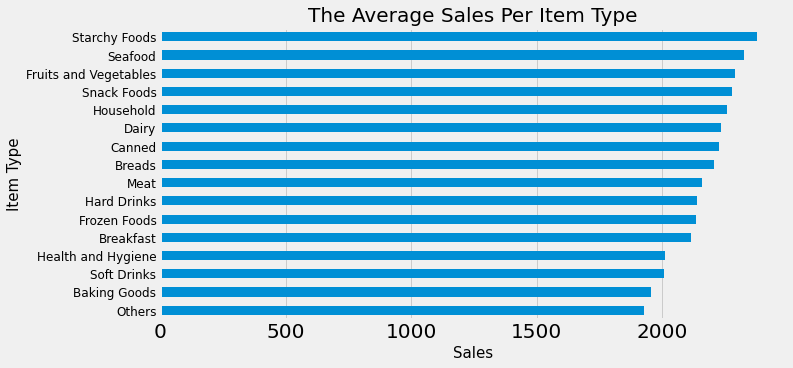

In [45]:
#Plotting and Styeling Bar Char
plt.style.use('fivethirtyeight')
plot_df2.plot(kind='barh', figsize=(10,5),width=0.5,fontsize=20,legend=None)
plt.title('The Average Sales Per Item Type',fontsize=20)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.ylabel('Item Type',fontsize=15)
plt.xlabel('Sales', fontsize=15);


# Sales prediction with Machine Learning

## Importing dataset again to pervent data leakage

In [46]:
df= pd.read_csv('/content/drive/MyDrive/coding dojo/stack_one/sales_predictions.csv')
df_ml = df.copy()
df_ml.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Preprocessing

### Dropping duplicate data

In [47]:
df_ml.drop_duplicates(inplace=True)
df_ml.duplicated().sum()

0

### fix inconsistencies in categorical data

In [48]:
df_ml['Item_Fat_Content'] = df_ml.loc[:, 'Item_Fat_Content'].str.replace('low fat', 'Low Fat').replace('LF','Low Fat').replace('reg','Regular')
df_ml['Outlet_Size'] = df_ml['Outlet_Size'].str.replace('Large','High')

### Identify the features (X) and target (y):

 "Item_Outlet_Sales" column is the target variables.

In [49]:
X = df_ml.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales', 'Outlet_Size','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content'])
y=df_ml['Item_Outlet_Sales']

### Identify each feature as numerical, ordinal, or nominal.

- Ordinal: Outlet_Size
-Nominal:Item_Type, Outlet_Location_Type, Outlet_Type	
-Numercal: The rest of the columns


## Train Test Split 

In [50]:
X_train, X_test , y_train, y_test = train_test_split(X,y, random_state=42)

## Making scalers

In [51]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
scaler = StandardScaler()

### Making Imputers

In [52]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

### Making column selector

In [53]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### Making the pipeline

In [54]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(most_frequent_imputer,ohe)

### Putting Pipelines and Selectors in tuples

In [55]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

### Putting it all in one column transformer

In [61]:
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder="passthrough")

###Fitting and tranforming data

In [66]:
#Fitting
preprocessor.fit(X_train,y_train)
#Preprocessing the data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [58]:
X_test_processed

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  0.        ,
         0.        ,  1.        ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  0.        ,
         1.        ,  0.        ],
       [-1.49772727, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  0.        ,
         1.        ,  0.        ]])

#Determining which model to use (linear regression model vs regression tree model)to predict sales.

##Linear regression model result 

In [76]:
#making the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed,y_train)
#Getting yhat
yhat_train = lin_reg.predict(X_train_processed)
yhat_test = lin_reg.predict(X_test_processed)

In [82]:
#R2
print(f"Train R-Squared: { round( lin_reg.score(X_train_processed, y_train),3) }")
print(f"Test R-Squared: { round( lin_reg.score(X_test_processed, y_test),3) }")
print('\n')
#RMSE
#Getting MSE first
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)
#Then Getting Rmse
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train R-Squared: 0.351
Test R-Squared: 0.341


Train RMSE: 1385.51
Test RMSE: 1348.62


## Regression tree model result

In [86]:
#making the model
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train_processed, y_train)
#Getting yhat
yhat_train2 = reg_tree.predict(X_train_processed)
yhat_test2 = reg_tree.predict(X_test_processed)

In [87]:
#R2
print(f"Train R-Squared: { round( reg_tree.score(X_train_processed, y_train),3) }")
print(f"Test R-Squared: { round( reg_tree.score(X_test_processed, y_test),3) }")
print('\n')
#RMSE
#Getting MSE first
mse_train = mean_squared_error(y_train, yhat_train2)
mse_test = mean_squared_error(y_test, yhat_test2)
#Then Getting Rmse
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train R-Squared: 1.0
Test R-Squared: 0.024


Train RMSE: 0.0
Test RMSE: 1640.99


## My Decision

The decision tree model have a high variance between training set and testing set and also a high bias on testing set. The linear regression model have lower variance than other model, and also it testing set lower bias than other model.
Therefore I decided to recommend linear regression model.
